In [1]:
import numpy
print(numpy.__version__)

1.14.6


In [2]:
import scipy
print(scipy.__version__)

0.19.1


In [3]:
import matplotlib
print(matplotlib.__version__)

2.1.2


In [4]:
import PIL
print(PIL.__version__)

4.0.0


In [25]:
import cv2
print(cv2.__version__)

3.4.3


In [0]:
import tensorflow
print(tensorflow.__version__)

In [7]:
# 下载lfw的人脸数据集
!curl -O http://vis-www.cs.umass.edu/lfw/lfw.tgz
  
# 解压缩包
!tar -xvf lfw.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  172M  100  172M    0     0  21.6M      0  0:00:07  0:00:07 --:--:-- 34.8M


In [0]:
import random
from glob import glob
import numpy as np

# 加载所有人脸图像，返回每张图像的路径，形成一个数组，最后将数组通过np.array()转换成NumPy数组
human_filepaths = np.array(glob("lfw/*/*"))
# 对human_filepaths数组变量里的数据通过shuffle()函数打乱混洗
random.shuffle(human_filepaths)

In [12]:
human_filepaths[:10]

array(['lfw/David_Collenette/David_Collenette_0001.jpg',
       'lfw/Rainer_Schuettler/Rainer_Schuettler_0001.jpg',
       'lfw/Silvan_Shalom/Silvan_Shalom_0004.jpg',
       'lfw/Jennifer_Aniston/Jennifer_Aniston_0014.jpg',
       'lfw/Tommy_Franks/Tommy_Franks_0012.jpg',
       'lfw/Albert_Pujols/Albert_Pujols_0001.jpg',
       'lfw/Elin_Nordegren/Elin_Nordegren_0001.jpg',
       'lfw/Lleyton_Hewitt/Lleyton_Hewitt_0035.jpg',
       'lfw/Colin_Powell/Colin_Powell_0075.jpg',
       'lfw/Pascal_Quignard/Pascal_Quignard_0002.jpg'], dtype='<U84')

In [13]:
print("human_files.shape={}".format(human_filepaths.shape))

human_files.shape=(13233,)


In [0]:
import matplotlib.pyplot as plt

# 设置matplotlib在绘图时使用默认样式
plt.style.use('default')

from matplotlib import image

Number of faces detected: 1


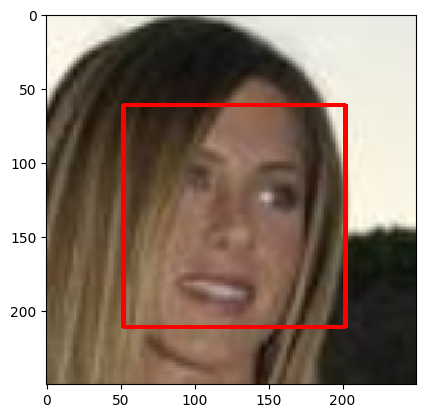

In [24]:
import cv2       

# 先使用OpenCV来检测人脸，OpenCV在Github上提供了很多个人脸检测模型，并以XML文件保存在
# 地址：https://github.com/opencv/opencv/tree/master/data/haarcascades
# 这里我们预先下载了一个haarcascade_frontalface_alt.xml的检测模型到本项目的github上。

# 提取OpenCV的人脸检测模型
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# 加载彩色（通道顺序为BGR）图像
img = cv2.imread(human_filepaths[3])

# 将BGR图像进行灰度处理
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 在图像中找出人脸
faces = face_cascade.detectMultiScale(gray)

# 打印图像中检测到的人脸的个数
print('Number of faces detected:', len(faces))

# 获取每一个所检测到的人脸的识别框
for (x,y,w,h) in faces:
    # 在人脸图像中以矩形形式绘制出识别框
    # 参数1：目标图像
    # 参数2：(x, y)起始坐标
    # 参数3：(x, y)检测到的人脸最大坐标
    # 参数4：绘制框的颜色，因为是BGR顺序，所以第三个255表示red，就是红色的框
    # 参数5：线框的宽度
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
# 将BGR图像转变为RGB图像以打印
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 展示含有识别框的图像
plt.imshow(cv_rgb)
plt.show()

In [28]:
# 加载人脸所属类别列表
# glob是一个文件操作相关的模块，通过指定的匹配模式，返回相应的文件或文件夹路径
# 这里的操作就是返回lfw目录下的所有文件夹
# 最后通过列表推导式遍历每个文件路径字符串，并截取人脸所属类别名称那段字符串

from glob import glob

facepath_prefix_len = len('lfw/')
face_names = [item[facepath_prefix_len:] for item in sorted(glob("lfw/*"))]
print("共计有{}个人脸".format(len(face_names)))

共计有5749个人脸


In [29]:
face_names[:10]

['AJ_Cook',
 'AJ_Lamas',
 'Aaron_Eckhart',
 'Aaron_Guiel',
 'Aaron_Patterson',
 'Aaron_Peirsol',
 'Aaron_Pena',
 'Aaron_Sorkin',
 'Aaron_Tippin',
 'Abba_Eban']

['lfw/Ronnie_Jagday/Ronnie_Jagday_0001.jpg'
 'lfw/Jean_Charest/Jean_Charest_0015.jpg'
 'lfw/Maha_Habib/Maha_Habib_0001.jpg'
 'lfw/Philip_Zalewski/Philip_Zalewski_0001.jpg'
 'lfw/Hamid_Karzai/Hamid_Karzai_0008.jpg'
 'lfw/Heidi_Klum/Heidi_Klum_0004.jpg' 'lfw/Ernie_Els/Ernie_Els_0002.jpg'
 'lfw/Joe_Dicaro/Joe_Dicaro_0001.jpg'
 'lfw/Russell_Simmons/Russell_Simmons_0002.jpg']


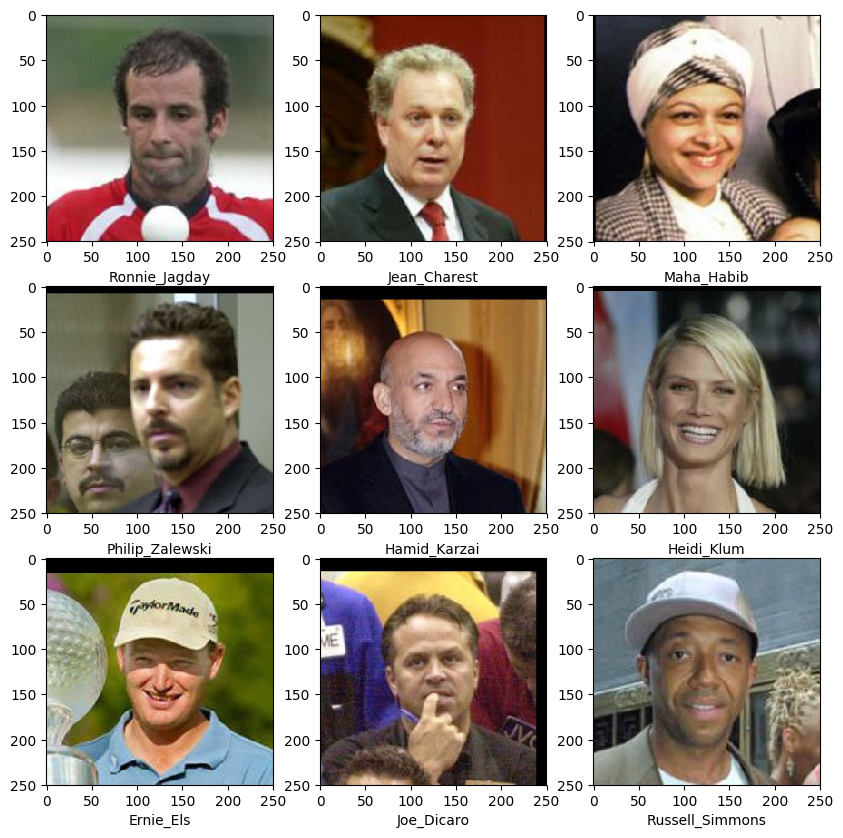

In [31]:
# 查看随机9张人脸的图像
# 创建9个绘图对象，3行3列
fig, axes = plt.subplots(nrows=3, ncols=3)
# 设置绘图的总容器大小
fig.set_size_inches(10, 10)

# 随机选择9个数，也就是9张人脸（可能重复，且每次都不一样）
random_9_nums = np.random.choice(len(human_filepaths), 9)
# 从数据集中选出9张图
random_9_imgs = human_filepaths[random_9_nums]
print(random_9_imgs)

# 根据这随机的9张图片路径，截取取得相应的人脸所属人物的名字
imgname_list = []
for imgpath in random_9_imgs:
    imgname = imgpath[facepath_prefix_len:] 
    imgname = imgname[:imgname.find('/')]
    imgname_list.append(imgname)

index = 0
for row_index in range(3): # 行
    for col_index in range(3): # 列
        # 读取图片的数值内容
        img = image.imread(random_9_imgs[index])
        # 获取绘图Axes对象，根据[行索引, 列索引]
        ax = axes[row_index, col_index]
        # 在Axes对象上显示图像
        ax.imshow(img)
        # 在绘图对象上设置人的名字
        ax.set_xlabel(imgname_list[index])
        # 索引加1
        index += 1
        

In [32]:
# 对数据集进行遍历，读取每张图片，并获取它的大小，对比每张图片是否大小一致
faces_shape_list = []
for filepath in human_filepaths:
    shape = image.imread(filepath).shape
    if len(shape) == 3 and shape[0] == 250 and shape[1] == 250 and shape[2] == 3:
        faces_shape_list.append(shape)
    else:
        print("找到一张异样大小的人脸图片。路径是：{}".format(filepath))
             
faces_shapes = np.asarray(faces_shape_list)

print("总共{}张。".format(len(faces_shapes)))
print("随机抽取三张图片的维度是{}。".format(faces_shapes[np.random.choice(len(faces_shapes), 3)]))

总共13233张。
随机抽取三张图片的维度是[[250 250   3]
 [250 250   3]
 [250 250   3]]。


# FaceNet开源人脸特征提取库

In [0]:
# 下载facenet人脸特征提取开源库
!git clone https://github.com/21-projects-for-deep-learning/facenet

In [39]:
import os

# 切换目录到facenet
os.chdir('facenet')

# 输出当前目录地址
print(os.getcwd())

/content/facenet


In [43]:
# 设置环境变量
os.environ["PYTHONPATH"] = "/content/facenet/src"

# 查看环境变量
print(os.environ["PYTHONPATH"])

/content/facenet/src


In [0]:
# 将上面下载的lfw人脸数据图像移动到本级目录
!cp -r ../lfw data/lfw

In [63]:
!ls

contributed  __init__.py  mydata     requirements.txt  test  util
data	     LICENSE.md   README.md  src	       tmp


In [0]:
# 处理图像
# 对齐数据图像，就是将图像中有人脸的部分都标准大小处理
!python src/align/align_dataset_mtcnn.py data/lfw/ data/lfw_output/ --image_size 160 --margin 32 --random_order --gpu_memory_fraction 0.25 

In [0]:
# 验证已对齐的图像数据，查看验证分值
!python src/validate_on_lfw.py \
    data/lfw_output/ \
    data/models/20180402-114759 \
    --distance_metric 1 \
    --use_flipped_images \
    --subtract_mean \
    --use_fixed_image_standardization

# 用classifier.py文件训练我们自己的数据

In [0]:
# 对齐我们自己的数据
!python src/align/align_dataset_mtcnn.py \
    mydata/my_own_datasets/ \
    mydata/my_own_datasets_output/ \
    --image_size 160 \
    --random_order \
    --gpu_memory_fraction 0.25 

In [0]:
# 训练
!python src/classifier.py \
  TRAIN \
  mydata/my_own_datasets_output \
  data/models/20180402-114759/ \
  data/models/20180402-114759/myown_classifier.pkl \
  --image_size 160

In [0]:
# 验证
!python src/classifier.py \
  CLASSIFY \
  mydata/my_own_datasets_output \
  data/models/20180402-114759/ \
  data/models/20180402-114759/myown_classifier.pkl \
  --image_size 160


# 用train_softmax.py文件训练我们自己的数据

In [0]:
os.chdir('mydata')

# 生成pairs.txt文件
!python generate_pairs.py

os.chdir('../')

In [0]:
# 训练
!python src/train_softmax.py \
    --logs_base_dir my_lfw_train/logs/facenet/ \
    --models_base_dir my_lfw_train/models/facenet/ \
    --data_dir mydata/my_own_datasets_output/ \
    --image_size 160 \
    --model_def models.inception_resnet_v1 \
    --lfw_dir mydata/my_own_datasets_output/ \
    --optimizer ADAM \
    --learning_rate -1 \
    --max_nrof_epochs 1 \
    --keep_probability 0.8 \
    --random_crop \
    --random_flip \
    --use_fixed_image_standardization \
    --learning_rate_schedule_file data/learning_rate_schedule_classifier_casia.txt \
    --weight_decay 5e-4 \
    --embedding_size 512 \
    --lfw_distance_metric 1 \
    --lfw_use_flipped_images \
    --lfw_subtract_mean \
    --validation_set_split_ratio 0.05 \
    --validate_every_n_epochs 5 \
    --prelogits_norm_loss_factor 5e-4 \
    --epoch_size 8 \
    --lfw_batch_size 16 \
    --lfw_pairs mydata/pairs.txt

In [0]:
# 验证
!python src/validate_on_lfw.py \
  mydata/my_own_datasets_output \ 
  my_lfw_train/models/facenet/20181107-034642 \ 
  --lfw_pairs mydata/pairs.txt \ 
  --lfw_batch_size 2 \ 
  --image_size 160 \ 
  --distance_metric 1 \ 
  --use_flipped_images \ 
  --subtract_mean \ 
  --use_fixed_image_standardization

# 将checkpoint的文件转换成.pb文件

In [0]:
!python src/freeze_graph.py \ 
    my_lfw_train/models/facenet/20181107-034642 \ 
    my_lfw_train/models/facenet/20181107-034642/20181107-034642.pb 

python src/freeze_graph.py my_lfw_train/models/facenet/20181107-034642 my_lfw_train/models/facenet/20181107-034642/20181107-034642.pb 

# 使用Face Recognition

In [0]:
# 方式一
!apt-get install build-essential cmake
!apt-get install libgtk-3-dev
!apt-get install libboost-all-dev
!pip install dlib 

In [0]:
# 方式二
!git clone https://github.com/davisking/dlib.git

# 下载完后，切换到dlib目录下
import os
os.chdir('dlib')

In [32]:
!ls

build		dlib  examples		 MANIFEST.in	  README.md  tools
CMakeLists.txt	docs  ISSUE_TEMPLATE.md  python_examples  setup.py


In [0]:
!python setup.py install 

In [0]:
# 安装face_recognition包
!pip install face_recognition

In [0]:
# 检测人脸面部特征
from PIL import Image, ImageDraw
import face_recognition

# 将图像文件加载到NumPy数组中
image = face_recognition.load_image_file("victor_test.jpeg")
# 查找图像中所有的面部特征
face_landmarks_list = face_recognition.face_landmarks(image)
print("找到{}张人脸。".format(len(face_landmarks_list)))

for face_landmarks in face_landmarks_list:

    # 图像中每个面部特征的key
    # 通过face_landmarks.keys()获取到的是一样的
    facial_features = [
        'chin',
        'left_eyebrow',
        'right_eyebrow',
        'nose_bridge',
        'nose_tip',
        'left_eye',
        'right_eye',
        'top_lip',
        'bottom_lip'
    ]

    # 将NumPy数组对象转换PIL.Image.Image对象
    pil_image = Image.fromarray(image)
    # 再将PIL.Image.Image对象转换成PIL.ImageDraw.ImageDraw，可供绘图
    new_img = ImageDraw.Draw(pil_image)

    # 根据找到的面部特征值
    for facial_feature in facial_features:
        # 来绘制线条，线条宽度是5
        new_img.line(face_landmarks[facial_feature], width=5)

    # 显示已经绘制过特征线条的图像
    pil_image.show()

In [0]:
# 实时人脸识别
import face_recognition
import cv2

# 获取网络摄像头webcam实例对象
video_capture = cv2.VideoCapture(0)

# 加载人脸图像函数
def load_person_image(person_filename):
    # 将图像文件加载到内存，以数组呈现
    person_image = face_recognition.load_image_file(person_filename)
    # 将图像数据编码为128维度的人脸矩阵数据，以NumPy数组返回
    person_face_encoding = face_recognition.face_encodings(person_image)[0]
    return person_face_encoding

# 加载已知人脸对象
victor_face_encoding = load_person_image("victor_test.jpeg")

# 创建已知人脸编码数组
known_face_encodings = [
    victor_face_encoding
]
# 创建已知人脸对象名字数组
known_face_names = [
    "Zhang Qiang"
]

# 初始化一些变量
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

# 创建一个无限循环的环境，以便于让程序一直在webcam摄像头中读取图像内容
while True:
    # 获取摄像头的单帧frame图像
    ret, frame = video_capture.read()
    
    # 为了检测和识别人脸更快些，我们将摄像头拍摄到的图像frame重新定义大小，是原大小的4分之1
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    
    # OpenCV使用BGR颜色通道
    # face_recognition使用RGB颜色通道
    # 这就将图像从BGR转换成RGB颜色通道
    rgb_small_frame = small_frame[:, :, ::-1]

    # 只处理每一帧视频，以节省时间
    if process_this_frame:
        # 在当前的视频帧中找出所有的人脸位置和人脸编码
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        # 遍历人脸图像编码，因为图像中可能会有多个人脸
        for face_encoding in face_encodings:
            # 将已知的人脸编码和检测到的人脸编码进行对比，就知道它们是否是同一个人了
            # 已知的人脸编码和检测到的人脸编码，可能在数值上有些差异，但是，只要在容错率范围内就可以，默认值是0.6
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # 如果人脸编码匹配上了，则将人脸对应的人名字取出来，反之，如果没有匹配上，就显示未知人脸
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]
            
            face_names.append(name)

    process_this_frame = not process_this_frame


    # 遍历人物名字和找到的人脸特征位置，并把它们绘制到图像上显示
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # 上面在做人脸检测和识别时，我们缩小了图像到4分之1大小，现在我们要把图像在还原回去
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # 在人脸周围绘制一个矩形框
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # 在人脸矩形框的下面再绘制一个实心的矩形框，用来将人物的名字显示上去
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # 将图像显示到视频窗口中
    cv2.imshow('Video', frame)

    # 在视频窗口，允许按下q键，退出程序
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 将创建的webcam实例对象手动释放掉
video_capture.release()
# 销毁所有的cv2窗口
cv2.destroyAllWindows()